# Assignment 3
### Due 9/23. Do four of five.
### Shiraz Robinson II

## Question 1

- Open the NHANES (or Ames prices or college completion datasets, if you prefer)

- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)

- Compute a contingency table for your categorical $X$ and $Y$

- Discuss any interesting patterns (or lack of one) that you observe

In [2]:
# Open nhanes_meta_17_18.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nhanes_meta = pd.read_csv("./data/nhanes_meta_17_18.csv")
nhanes_meta.head(10)

,VariableNameLong,Variable,Type,Format,Informat,Label,Source,VariableName,SASLabel,EnglishText,Target,VariableNameLong_variable_df,Source_variable_df,EnglishInstructions,HardEdits,Recoded,CustomRecoding,nNonNA
0,GeneralHealthCondition,HSD010,Numeric,NaN,NaN,General health condition,HSQ,HSD010,General health condition,Next I have some general questions about {your...,Both males and females 12 YEARS -\n\n\t\t\t15...,GeneralHealthCondition,HSQ,NaN,NaN,True,NaN,5964.0
1,EverBreastfedOrFedBreastmilk,DBQ010,Numeric,NaN,NaN,Ever breastfed or fed breastmilk,DBQ,DBQ010,Ever breastfed or fed breastmilk,Now I'm going to ask you some general question...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,EverBreastfedOrFedBreastmilk,DBQ,NaN,NaN,True,YesNo,1069.0
2,AgeStoppedBreastfeedingdays,DBD030,Numeric,NaN,NaN,Age stopped breastfeeding(days),DBQ,DBD030,Age stopped breastfeeding(days),How old was {SP} when {he/she} completely stop...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStoppedBreastfeedingdays,DBQ,NaN,NaN,False,NaN,862.0
3,AgeFirstFedFormuladays,DBD041,Numeric,NaN,NaN,Age first fed formula(days),DBQ,DBD041,Age first fed formula(days),How old was {SP} when {he/she} was first fed f...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeFirstFedFormuladays,DBQ,NaN,NaN,False,NaN,1077.0
4,AgeStoppedReceivingFormuladays,DBD050,Numeric,NaN,NaN,Age stopped receiving formula(days),DBQ,DBD050,Age stopped receiving formula(days),How old was {SP} when {he/she} completely stop...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStoppedReceivingFormuladays,DBQ,NaN,NaN,False,NaN,891.0
5,AgeStartedOtherFoodbeverage,DBD055,Numeric,NaN,NaN,Age started other food/beverage,DBQ,DBD055,Age started other food/beverage,This next question is about the first thing th...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStartedOtherFoodbeverage,DBQ,NaN,NaN,False,NaN,1077.0
6,AgeFirstFedMilkdays,DBD061,Numeric,NaN,NaN,Age first fed milk(days),DBQ,DBD061,Age first fed milk(days),How old was {SP} when {he/she} was first fed m...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeFirstFedMilkdays,DBQ,NaN,NaN,False,NaN,1066.0
7,TypeOfMilkFirstFedWholeMilk,DBQ073A,Numeric,NaN,NaN,Type of milk first fed - whole milk,DBQ,DBQ073A,Type of milk first fed - whole milk,What type of milk was {SP} first fed? Was it ...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,TypeOfMilkFirstFedWholeMilk,DBQ,CODE ALL THAT APPLY,NaN,True,NaN,738.0
8,TypeOfMilkFirstFed2Milk,DBQ073B,Numeric,NaN,NaN,Type of milk first fed - 2% milk,DBQ,DBQ073B,Type of milk first fed - 2% milk,What type of milk was {SP} first fed? Was it ...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,TypeOfMilkFirstFed2Milk,DBQ,CODE ALL THAT APPLY,NaN,False,NaN,186.0
9,TypeOfMilkFirstFed1Milk,DBQ073C,Numeric,NaN,NaN,Type of milk first fed - 1% milk,DBQ,DBQ073C,Type of milk first fed - 1% milk,What type of milk was {SP} first fed? Was it ...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,TypeOfMilkFirstFed1Milk,DBQ,CODE ALL THAT APPLY,NaN,False,NaN,36.0


In [3]:
nhanes_meta["Type"].value_counts()

Type
Numeric      195
Character      2
Name: count, dtype: int64

In [4]:
nhanes_meta[nhanes_meta["Type"] == "Character"]

,VariableNameLong,Variable,Type,Format,Informat,Label,Source,VariableName,SASLabel,EnglishText,Target,VariableNameLong_variable_df,Source_variable_df,EnglishInstructions,HardEdits,Recoded,CustomRecoding,nNonNA
57,UsualSleepTimeOnWeekdaysOrWorkdays,SLQ300,Character,NaN,NaN,Usual sleep time on weekdays or workdays,SLQ,SLQ300,Usual sleep time on weekdays or workdays,What time {do you/does SP} usually fall asleep...,Both males and females 16 YEARS -\t\t\t150 YEARS,UsualSleepTimeOnWeekdaysOrWorkdays,SLQ,Character variable 'HH:MM' ('00:00' to '23:30'),NaN,False,NaN,5828.0
58,UsualWakeTimeOnWeekdaysOrWorkdays,SLQ310,Character,NaN,NaN,Usual wake time on weekdays or workdays,SLQ,SLQ310,Usual wake time on weekdays or workdays,What time {do you/does SP} usually wake up on ...,Both males and females 16 YEARS -\t\t\t150 YEARS,UsualWakeTimeOnWeekdaysOrWorkdays,SLQ,Character variable 'HH:MM' ('00:00' to '23:30'),NaN,False,NaN,5828.0


In [5]:
nhanes_meta[nhanes_meta["Type"] == "Numeric"].head()

,VariableNameLong,Variable,Type,Format,Informat,Label,Source,VariableName,SASLabel,EnglishText,Target,VariableNameLong_variable_df,Source_variable_df,EnglishInstructions,HardEdits,Recoded,CustomRecoding,nNonNA
0,GeneralHealthCondition,HSD010,Numeric,NaN,NaN,General health condition,HSQ,HSD010,General health condition,Next I have some general questions about {your...,Both males and females 12 YEARS -\n\n\t\t\t15...,GeneralHealthCondition,HSQ,NaN,NaN,True,NaN,5964.0
1,EverBreastfedOrFedBreastmilk,DBQ010,Numeric,NaN,NaN,Ever breastfed or fed breastmilk,DBQ,DBQ010,Ever breastfed or fed breastmilk,Now I'm going to ask you some general question...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,EverBreastfedOrFedBreastmilk,DBQ,NaN,NaN,True,YesNo,1069.0
2,AgeStoppedBreastfeedingdays,DBD030,Numeric,NaN,NaN,Age stopped breastfeeding(days),DBQ,DBD030,Age stopped breastfeeding(days),How old was {SP} when {he/she} completely stop...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStoppedBreastfeedingdays,DBQ,NaN,NaN,False,NaN,862.0
3,AgeFirstFedFormuladays,DBD041,Numeric,NaN,NaN,Age first fed formula(days),DBQ,DBD041,Age first fed formula(days),How old was {SP} when {he/she} was first fed f...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeFirstFedFormuladays,DBQ,NaN,NaN,False,NaN,1077.0
4,AgeStoppedReceivingFormuladays,DBD050,Numeric,NaN,NaN,Age stopped receiving formula(days),DBQ,DBD050,Age stopped receiving formula(days),How old was {SP} when {he/she} completely stop...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStoppedReceivingFormuladays,DBQ,NaN,NaN,False,NaN,891.0


In [6]:
nhanes_meta.head()

,VariableNameLong,Variable,Type,Format,Informat,Label,Source,VariableName,SASLabel,EnglishText,Target,VariableNameLong_variable_df,Source_variable_df,EnglishInstructions,HardEdits,Recoded,CustomRecoding,nNonNA
0,GeneralHealthCondition,HSD010,Numeric,NaN,NaN,General health condition,HSQ,HSD010,General health condition,Next I have some general questions about {your...,Both males and females 12 YEARS -\n\n\t\t\t15...,GeneralHealthCondition,HSQ,NaN,NaN,True,NaN,5964.0
1,EverBreastfedOrFedBreastmilk,DBQ010,Numeric,NaN,NaN,Ever breastfed or fed breastmilk,DBQ,DBQ010,Ever breastfed or fed breastmilk,Now I'm going to ask you some general question...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,EverBreastfedOrFedBreastmilk,DBQ,NaN,NaN,True,YesNo,1069.0
2,AgeStoppedBreastfeedingdays,DBD030,Numeric,NaN,NaN,Age stopped breastfeeding(days),DBQ,DBD030,Age stopped breastfeeding(days),How old was {SP} when {he/she} completely stop...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStoppedBreastfeedingdays,DBQ,NaN,NaN,False,NaN,862.0
3,AgeFirstFedFormuladays,DBD041,Numeric,NaN,NaN,Age first fed formula(days),DBQ,DBD041,Age first fed formula(days),How old was {SP} when {he/she} was first fed f...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeFirstFedFormuladays,DBQ,NaN,NaN,False,NaN,1077.0
4,AgeStoppedReceivingFormuladays,DBD050,Numeric,NaN,NaN,Age stopped receiving formula(days),DBQ,DBD050,Age stopped receiving formula(days),How old was {SP} when {he/she} completely stop...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStoppedReceivingFormuladays,DBQ,NaN,NaN,False,NaN,891.0


In [7]:
# Open NHANES data

nhanes = pd.read_csv("./data/nhanes_data_17_18.csv")
nhanes

/var/folders/n2/lt2mc7z901q9k1mx_2s6ypb00000gn/T/ipykernel_83223/134970523.py:3: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv("./data/nhanes_data_17_18.csv")


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
nhanes["GeneralHealthCondition"].value_counts()

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [9]:
nhanes["GeneralHealthCondition"].isna().sum()

np.int64(2402)

In [10]:
nhanes["TimesLost10LbsOrMoreToLoseWeight"].value_counts()

TimesLost10LbsOrMoreToLoseWeight
Never               2846
1 to 2              1579
3 to 5               818
6 to 10              277
11 times or more     274
Name: count, dtype: int64

In [11]:
nhanes["TimesLost10LbsOrMoreToLoseWeight"].isna().sum()

np.int64(2572)

In [12]:
pd.crosstab(nhanes["GeneralHealthCondition"], nhanes["TimesLost10LbsOrMoreToLoseWeight"])

TimesLost10LbsOrMoreToLoseWeight,1 to 2,11 times or more,3 to 5,6 to 10,Never
GeneralHealthCondition,,,,,
Excellent,118,22,46,10,304
Fair or,307,56,179,71,509
Good,637,112,324,118,1063
Poor?,41,12,29,6,79
Very good,374,60,203,53,657


### **Observations**

**1.** Most people report never losing 10 lbs or more

**2.** Poor health and frequent weight loss attempts

**3.** Better health conditions skew toward fewer attempts

**4.** NaN values are large and may skew interpretation

**5.** General pattern: more frequent weight-loss attempts may be linked to worse self-reported health. 

## Question 2

- Open the NHANES dataset

- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)

- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$

- Discuss any interesting patterns (or lack of one) that you observe

In [13]:
nhanes

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
nhanes["TriedToQuitSmoking"].value_counts()

TriedToQuitSmoking
1.0    517
0.0    469
Name: count, dtype: int64

In [15]:
nhanes["TriedToQuitSmoking"].isna().sum()

np.int64(7380)

In [16]:
nhanes["AvgCigarettesdayDuringPast30Days"].value_counts()

AvgCigarettesdayDuringPast30Days
20.0     191
10.0     178
2.0       77
5.0       74
3.0       65
15.0      60
1.0       58
4.0       50
6.0       47
7.0       40
12.0      25
8.0       25
30.0      20
40.0      15
25.0       8
13.0       6
16.0       6
9.0        6
18.0       5
14.0       4
17.0       4
11.0       3
35.0       2
999.0      1
27.0       1
60.0       1
22.0       1
777.0      1
Name: count, dtype: int64

In [17]:
nhanes["AvgCigarettesdayDuringPast30Days"].isna().sum()

np.int64(7392)

In [18]:
pd.crosstab(nhanes["TriedToQuitSmoking"], nhanes["AvgCigarettesdayDuringPast30Days"])

AvgCigarettesdayDuringPast30Days,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,20.0,22.0,25.0,27.0,30.0,35.0,40.0,60.0,777.0,999.0
TriedToQuitSmoking,,,,,,,,,,,,,,,,,,,,,
0.0,20,24,16,17,29,14,19,16,2,88,...,112,0,6,1,16,0,11,1,1,0
1.0,38,53,49,33,45,33,21,9,4,90,...,79,1,2,0,4,2,4,0,0,1


<Axes: xlabel='AvgCigarettesdayDuringPast30Days', ylabel='Density'>

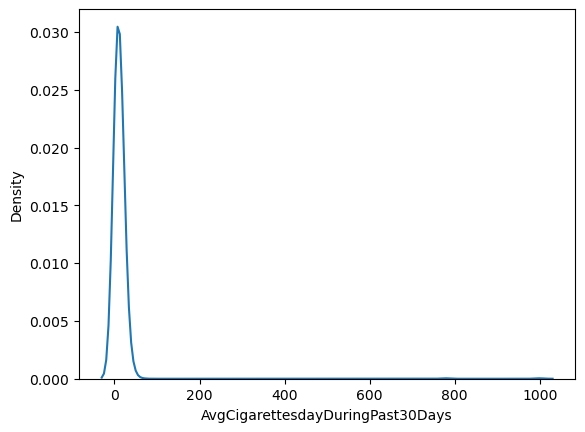

In [19]:
sns.kdeplot(nhanes["AvgCigarettesdayDuringPast30Days"])

<Axes: xlabel='AvgCigarettesdayDuringPast30Days', ylabel='Density'>

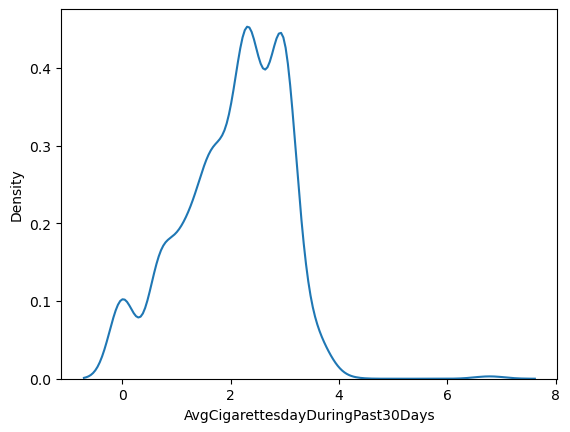

In [20]:
sns.kdeplot(np.log(nhanes["AvgCigarettesdayDuringPast30Days"]))

<Axes: xlabel='AvgCigarettesdayDuringPast30Days', ylabel='Proportion'>

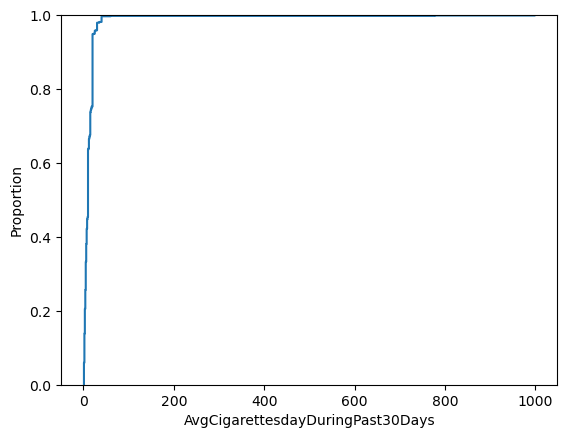

In [21]:
sns.ecdfplot(nhanes["AvgCigarettesdayDuringPast30Days"])

<Axes: xlabel='AvgCigarettesdayDuringPast30Days', ylabel='Proportion'>

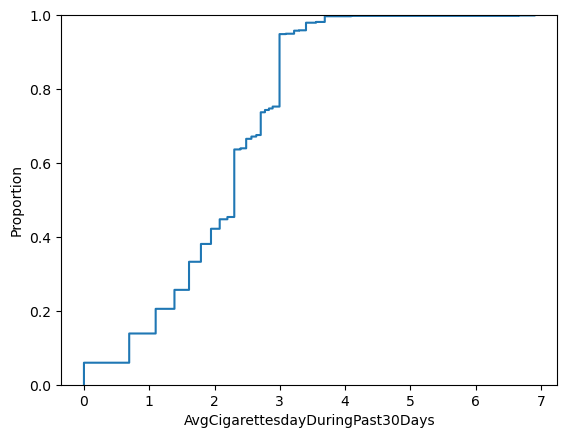

In [22]:
sns.ecdfplot(np.log(nhanes["AvgCigarettesdayDuringPast30Days"]))

### **Observations**

1. **Tried to Quit Smoking**

    - About **517 people (1.0)** reported trying to quit, compared to **469 people (0.0)** who did not.

    - But there are **7,380 missing values**, which is **much larger than the number of responses**. 


2. **Average Cigarettes Per Day**

    - The **most common values** are **20 cigarettes/day (1 pack, 191 people)** and **10 cigarettes/day (178 people)**.

    - Other smaller modes appear at **15/day**, **5/day**, **3/day** and so on - these numbers suggest people may estimate or round their smoking habits.

    - Strange values like **777** and **999** show up, whch are likely **codes for missing or refused responses** rather than real counts.


3. **Cross-tab with Tried to Quit Smoking** 

    - Across most smoking levels (e.g., 10/day, 20/day), there are **both quitters and non-quitters**.

    - For heavy smokers (20+ cigarettes/day), many still tried to quit, but success or persistence isn't clear from this dataset.

    - There isn't a sharp threshold where "quit attempts" suddenly increase; rather, both light and heavy smokers reported trying.


4. **Distribution Patterns**

    - **Raw KDE plot** is extremely skewed right, dominated by low/moderate smoking values, but stretched by outliers (777, 999, etc.). 

    - **Log transformation** makes the distribution more interpretable: it shows **peaks around 2-3 cigarettes (log scale)**, correspondin to 7-20 cigarettes/day. This reveals that the population clusters into light/moderate vs. pack-a-day smokers.

    - **ECDF plots** confirms this:

        - Without log transform, it jumps quickly - most people under 40 cigarettes/day.

        - On the log scale, you can better see the gradual spread between 1 and 30 per day.
        

5. **Interesting Observations**

    - **Clustering of behavior**: People tend to report common pack sizes (10, 20, 30, 40).

    - **Quit attempts are fairly evenly distributed** across smoking levels - so higher smoking intensity doesn't clearly stop people from trying to quit.

    - **Data quality issues**: 7,000+ missing values for quitting attempts and extreme codes (777, 999) must be cleaned before analysis.

    - **Skewness**: Log-transform helps reveal underlying groupings (light vs. pack-a-day smokers).

## Question 3

We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

# **The LCLS/Naradaya-Watson Estimator Derivation**

## Step 1: Set $\frac{1}{h}k\left(\frac{z-x_i}{h}\right)$ $=$ $w_i(z)$

## $MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 w_i(z)$

## Step 2: Differentiate with respect to $\hat{y}(z)$ and set the equation equal to zero.

## $\frac{\partial}{\partial\hat{y}(z)}MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N 2 \left\lbrace y_i - \hat{y}(z) \right\rbrace w_i(z) = 0$

# Step 3: Simplify.

## $\frac{\partial}{\partial\hat{y}(z)}MSE(\hat{y}(z)) = \dfrac{2}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace w_i(z) = 0$

## Step 4: Multiply the entire equation by $\frac{N}{2}$.

## $\frac{\partial}{\partial\hat{y}(z)}MSE(\hat{y}(z)) = \frac{N}{2} \cdot \left(\dfrac{2}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace w_i(z) \right) = 0$

# Step 5: Simplify.

## $\frac{\partial}{\partial\hat{y}(z)}MSE(\hat{y}(z)) = \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace w_i(z) = 0$

## Step 6: Expand $\sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace w_i(z)$.

## $\sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace w_i(z) \Rightarrow \sum_{i=1}^N y_i w_i(z) - \hat{y}(z) \sum_{i=1}^N w_i(z)$

## Step 7: Update $\frac{\partial}{\partial\hat{y}(z)}MSE(\hat{y}(z)) = \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace w_i(z) = 0$.

## $\frac{\partial}{\partial\hat{y}(z)}MSE(\hat{y}(z)) = \sum_{i=1}^N y_i w_i(z) - \hat{y}(z) \sum_{i=1}^N w_i(z) = 0$

## Step 8: Add $\hat{y}(z) \sum_{i=1}^N w_i(z)$ on both sides. 

## $\frac{\partial}{\partial\hat{y}(z)}MSE(\hat{y}(z)) = \sum_{i=1}^N y_i w_i(z) = \hat{y}(z) \sum_{i=1}^N w_i(z)$

## Step 9: Solve for $\hat{y}(z)$ by dividing $\sum_{i=1}^N w_i(z)$ on both sides.

## $\frac{\partial}{\partial\hat{y}(z)}MSE(\hat{y}(z)) = \hat{y}(z) = \frac{\sum_{i=1}^N y_i w_i(z)}{ \sum_{i=1}^N w_i(z)}$

## Step 10: Perform back substitution for $w_i(z)$, multiply by $1$ and then box the LCLS/Naradaya-Watson Estimator.

## $$\boxed{\hat{y}(z) = \frac{\frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}}$$

## Question 4

- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.

- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [23]:
nhanes

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Computed bandwidth is: 1.5330537154058959


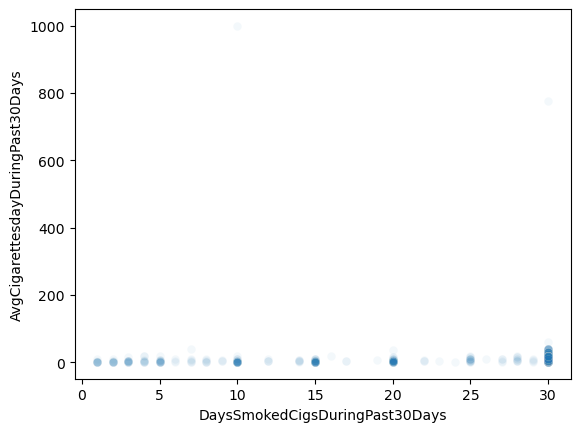

In [28]:
x = nhanes['DaysSmokedCigsDuringPast30Days']
y = nhanes['AvgCigarettesdayDuringPast30Days']

def lcls(x,y, h = None, plot=True):
    ''' Computes local constant least squares regression estimates with Gaussian kernel. '''

    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    # Compute bandwidth, if none provided:
    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
        print(f'Computed bandwidth is: {h}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    # Plot results:
    if plot:
        sns.scatterplot(data=nhanes, y='AvgCigarettesdayDuringPast30Days', x='DaysSmokedCigsDuringPast30Days',alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')

    return y_hat, grid

y_hat, grid = lcls(x,y)

## Key Observations

1. **Heavy zero-inflation:** Many individuals report very few or 0 smoking days, clustering at the left.

2. **Heterogeneous consumption:** Some who smoke every day (30 days) have low daily averages, while others have very high averages (hundreds of cigarettes/day reported, likely outliers or reporting errors).

3. **Regression trend:** The fitted curve increases gradually with more smoking days, but is pulled upwards by high-outlier reports in the upper range.

4. **Bandwidth impact:** With $h = 1.53$, the fit is relatively smooth - capturing general increase without overfitting noisy spikes.